<a href="https://colab.research.google.com/github/Akashkunwar/dscodes/blob/master/cases_vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
###COVID DATA
## Retreving Data
# Assigning Github URLs
cases_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
# recovered_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Reading URLs through Pandas liberary
total_cases = pd.read_csv(cases_url)
total_deaths = pd.read_csv(deaths_url)
# total_recovered = pd.read_csv(recovered_url)

## Cleaning Data
# Extreacting and storing column dates in dates
dates = total_cases.columns[4:]

# Reshaping total cases column from wide shape to df shape
total_cases_df = total_cases.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
    )

# Reshaping total deaths column from wide shape to df shape
total_deaths_df = total_deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
    )

# # Reshaping total recovered column from wide shape to df shape
# total_recovered_df = total_recovered.melt(
#     id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
#     value_vars=dates, 
#     var_name='Date', 
#     value_name='Recovered'
# )

# Merging total_cases_df and total_deaths_df
covid_df = total_cases_df.merge(
  right=total_deaths_df, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

# # Merging covid_df and total_recovered_df
# covid_df = covid_df.merge(
#   right=total_recovered_df, 
#   how='left',
#   on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
# )

# Converting Date to proper datetime format
covid_df["Date"] = pd.to_datetime(covid_df["Date"])

# Inserting converted date to full table
covid_df = covid_df.sort_values(['Country/Region', 'Date'])
#covid_df = covid_df.sort_values(['Country/Region', 'Date'], ascending=[True, True])
# Reseting Index
# covid_df = covid_df.reset_index()

# Copying covid_df to covid_df
#covid_df = covid_df.copy()

# Renaming column names
covid_df = covid_df.rename(columns={'Country/Region': 'country',
                                    'Province/State':'province',
                                    'Confirmed': 'total_cases',
                                    'Deaths': 'total_deaths',
                                    'Date':'date'})

# Filling NaN value of provinve with country name and storing it in coiuntry column
covid_df["province"] = covid_df["province"].fillna(covid_df["country"])
covid_df["country"] = covid_df["province"]

# Adding New cases, New deaths, New recovered to covid_df
covid_df["daily_cases"] = covid_df.groupby('country')['total_cases'].diff().fillna(0)
covid_df["daily_deaths"] = covid_df.groupby('country')['total_deaths'].diff().fillna(0)
# covid_df["New recovered"] = covid_df.groupby('country')['Total recovered'].diff().fillna(0)

# Converting float value to int in covid_df columns
# covid_df["Total recovered"] = covid_df["Total recovered"].fillna(0)
# covid_df["Total recovered"] = covid_df["Total recovered"].astype(int).fillna(0)
covid_df["daily_cases"] = covid_df["daily_cases"].astype(int)
covid_df["daily_deaths"] = covid_df["daily_deaths"].astype(int)
# covid_df["New recovered"] = covid_df["New recovered"].astype(int)

# Arranging Columns
covid_df = covid_df[['date', 'province', 'country','Lat','Long',
 'total_cases', 'total_deaths', 'daily_cases','daily_deaths']]

# Removind unnecessary columns
covid_df = covid_df.drop(['province', 'Lat', 'Long'],axis=1)

# Removing unnecessary spaces and making all columns in lowercase
covid_df.country = covid_df.country.str.lower().str.strip()

# Reseting jumbled index in order
covid_df = covid_df.reset_index(drop=True)

In [3]:
###VACCINE DATA
## Retreving Data
# Assigning Github URLs
vaccine_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccine_data['date']=pd.to_datetime(vaccine_data.date)

#Date format change
vaccine_data['date'] = pd.to_datetime(vaccine_data['date'],format='%y-%m-%d').dt.date

#Dropping uncecessary data
vaccine_data.drop(['total_vaccinations_per_hundred',
                   'iso_code',
                   'people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred',
                   'daily_vaccinations_per_million',
                   'daily_vaccinations_raw',
                   'total_vaccinations',
                   'people_vaccinated',
                   'daily_people_vaccinated_per_hundred',
                   'total_boosters_per_hundred'], inplace=True, axis=1)

#Rename vaccines to vaccine_name
# vaccine_data.rename(columns = {'vaccines':'vaccine_name'}, inplace = True) 

#Adding total vaccination column
Total_vaccinations = vaccine_data.groupby('location')['daily_vaccinations'].cumsum()
vaccine_data.insert(5,'Total_vaccinations',Total_vaccinations)

#Renaming columns
vaccine_df = vaccine_data.rename(columns={'location': 'country',
                                    # 'date':'Date',
                                    'people_fully_vaccinated': 'fully_vaccinated',
                                    # 'total_boosters': 'Total boosters',
                                    'Total_vaccinations':'total_vaccinations',
                                    # 'daily_vaccinations': 'Daily vaccinations',
                                    # 'daily_people_vaccinated': 'Daily people vaccinated'})
                                    })
#Arranging columns
vaccine_df = vaccine_df[['date',
                         'country',
                         "fully_vaccinated",
                         'total_vaccinations',
                         'total_boosters',
                         'daily_vaccinations',
                         'daily_people_vaccinated']]

# Converting date to proper datetime format
vaccine_df["date"] = pd.to_datetime(vaccine_df["date"])
vaccine_df = vaccine_df.fillna(0)
vaccine_df = vaccine_df.astype({"fully_vaccinated":'int',
                                'total_vaccinations':'int',
                                'total_boosters':'int',
                                'daily_vaccinations':'int',
                                'daily_people_vaccinated':'int'})

# Removing unnecessary spaces and making all columns in lowercase
vaccine_df.country = vaccine_df.country.str.lower().str.strip()

In [4]:
cov = list(set(covid_df.country) - set(vaccine_df.country))
vac = list(set(vaccine_df.country) - set(covid_df.country))
uni = set(covid_df.country).union(set(vaccine_df.country))
inter = set(covid_df.country).intersection(set(vaccine_df.country))

print('cov :',len(cov))
print('vac :',len(vac))
print('uni :',len(uni))
print('inter :',len(inter))

cov : 90
vac : 41
uni : 325
inter : 194


In [5]:
covid_df = covid_df[covid_df.country != 'ms zaandam']

covid_df.country = covid_df.country.replace(['congo (brazzaville)',
                                             'congo (kinshasa)',
                                             'falkland islands (malvinas)',
                                             'korea, north',
                                             'korea, south',
                                             'taiwan*',
                                             'us',
                                             'timor-leste',
                                             'summer olympics 2020',
                                             'burma',
                                             'west bank and gaza',
                                             'bonaire, sint eustatius and saba',
                                             'faroe islands'],
                                            ['democratic republic of congo',
                                             'congo',
                                             'falkland islands',
                                             'north korea',
                                             'south korea',
                                             'taiwan',
                                             'united states',
                                             'timor',
                                             'japan',
                                             'myanmar',
                                             'palestine',
                                             'bonaire sint eustatius and saba',
                                             'denmark'])


covid_df.country = covid_df.country.replace(['australian capital territory',
                                             'new south wales',
                                             'western australia',
                                             'tasmania',
                                             'south australia',
                                             'queensland',
                                             'northern territory',
                                             'victoria'],'australia')

covid_df.country = covid_df.country.replace(['anhui', 'beijing', 'chongqing', 
                                             'fujian', 'gansu', 'guangdong',
                                             'guangxi', 'guizhou', 'hainan', 
                                             'hebei', 'heilongjiang', 'henan',
                                             'hubei', 'hunan', 'inner mongolia', 
                                             'jiangsu','jiangxi', 'jilin', 
                                             'liaoning', 'macau', 'ningxia', 
                                             'qinghai','shaanxi', 'shandong', 
                                             'shanghai', 'shanxi', 'sichuan', 
                                             'tianjin','tibet', 'unknown', 
                                             'xinjiang', 'yunnan', 'zhejiang',
                                             'winter olympics 2022'],
                                            'china')

covid_df.country = covid_df.country.replace(['alberta','british columbia',
                                             'diamond princess','yukon',
                                             'saskatchewan','quebec',
                                             'prince edward island',
                                             'northwest territories',
                                             'nova scotia','nunavut',
                                             'ontario','new brunswick',
                                             'newfoundland and labrador',
                                             'manitoba',
                                             'repatriated travellers',
                                             'grand princess'],'canada')

covid_df.country = covid_df.country.replace(['sint maarten',
                                             'saint pierre and miquelon',
                                             'saint barthelemy','martinique',
                                             'mayotte','french guiana',
                                             'guadeloupe','reunion',
                                             'st martin','french polynesia',
                                             'wallis and futuna'],'france overseas')

covid_df.country = covid_df.country.replace(['channel islands',
                                             'saint helena, ascension and tristan da cunha',
                                             'bermuda','british virgin islands',
                                             'cabo verde','cayman islands','turks and caicos islands'],
                                            'british overseas')

covid_df = covid_df.groupby(['country','date'], as_index=False).sum()

In [6]:
vaccine_df = vaccine_df[vaccine_df.country != 'africa']
vaccine_df = vaccine_df[vaccine_df.country != 'asia']
vaccine_df = vaccine_df[vaccine_df.country != 'europe']
vaccine_df = vaccine_df[vaccine_df.country != 'european union']
vaccine_df = vaccine_df[vaccine_df.country != 'high income']
vaccine_df = vaccine_df[vaccine_df.country != 'low income']
vaccine_df = vaccine_df[vaccine_df.country != 'lower middle income']
vaccine_df = vaccine_df[vaccine_df.country != 'north america']
vaccine_df = vaccine_df[vaccine_df.country != 'south america']
vaccine_df = vaccine_df[vaccine_df.country != 'upper middle income']
vaccine_df = vaccine_df[vaccine_df.country != 'world']

vaccine_df.country = vaccine_df.country.replace(['macao','nauru','tokelau','sint maarten (dutch part)','faeroe islands'],
                                            ['china','oceania','new zealand','netherlands','denmark'])


vaccine_df.country = vaccine_df.country.replace(['wales','england','scotland',
                                                 'northern ireland'],
                                                'united kingdom')

vaccine_df.country = vaccine_df.country.replace(['pitcairn','saint helena'
                                                 'anguilla','bermuda', 
                                                 'british virgin islands', 
                                                 'cayman islands', 
                                                 'saint helena',
                                                 'isle of man', 'montserrat', 
                                                 'turks and caicos islands'],
                                                'british overseas')

vaccine_df.country = vaccine_df.country.replace(['french polynesia', 
                                                 'new caledonia',
                                                 'wallis and futuna',
                                                 'sint maarten',
                                                 'saint pierre and miquelon',
                                                 'saint barthelemy',
                                                 'martinique', 'mayotte',
                                                 'french guiana', 'guadeloupe',
                                                 'reunion', 'st martin',
                                                 'new caledonia'],
                                                'france overseas')

In [7]:
cov = list(set(covid_df.country) - set(vaccine_df.country))
vac = list(set(vaccine_df.country) - set(covid_df.country))
uni = set(covid_df.country).union(set(vaccine_df.country))
inter = set(covid_df.country).intersection(set(vaccine_df.country))

print('cov :',len(cov))
print('vac :',len(vac))
print('uni :',len(uni))
print('inter :',len(inter))

cov : 10
vac : 6
uni : 216
inter : 200


In [8]:
df = pd.merge(covid_df, vaccine_df, how="outer", on=["date", "country"])
df.fillna(0,inplace=True)

In [9]:
df

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,afghanistan,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,afghanistan,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,afghanistan,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,afghanistan,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,afghanistan,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
198786,tuvalu,2022-04-01,0.0,0.0,0.0,0.0,0.0,10200.0,0.0,3.0,1.0
198787,tuvalu,2022-04-02,0.0,0.0,0.0,0.0,0.0,10203.0,0.0,3.0,1.0
198788,tuvalu,2022-04-03,0.0,0.0,0.0,0.0,0.0,10206.0,0.0,3.0,1.0
198789,tuvalu,2022-04-04,0.0,0.0,0.0,0.0,0.0,10209.0,0.0,3.0,1.0


In [27]:
cn = list(df.country.unique())

In [24]:
df[df.country=='india']

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
84489,india,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
84490,india,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
84491,india,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
84492,india,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
84493,india,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85384,india,2022-07-05,43547809.0,525270.0,16159.0,28.0,917105118.0,1.977748e+09,45865246.0,1107889.0,145329.0
85385,india,2022-07-06,43566739.0,525305.0,18930.0,35.0,917703086.0,1.978800e+09,46203182.0,1051863.0,138257.0
85386,india,2022-07-07,43585554.0,525343.0,18815.0,38.0,918417650.0,1.979835e+09,46713451.0,1035096.0,134721.0
85387,india,2022-07-08,43604394.0,525386.0,18840.0,43.0,919261729.0,1.980944e+09,47399366.0,1109162.0,141589.0


In [40]:
ind = df[df.country==''].tail(1)
fr = df[df.country=='france'].tail(1)
fra = df[df.country=='fra'].tail(1)

In [41]:
ind

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated


In [39]:
fra.append(fr, ignore_index=True)

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,france,2022-07-09,31235794.0,146682.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
world = df[df.country==''].tail(1)
con = list(df.country.unique())
for x in con:
  world = world.append(df[df.country==x].tail(1), ignore_index=True)
world

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,afghanistan,2022-07-09,183235.0,7728.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
1,albania,2022-07-09,286732.0,3512.0,1001.0,2.0,0.0,0.0,0.0,0.0,0.0
2,algeria,2022-07-09,266246.0,6875.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
3,andorra,2022-07-09,44671.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,angola,2022-07-09,101320.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
211,oceania,2022-07-08,0.0,0.0,0.0,0.0,27778884.0,0.0,17190158.0,0.0,0.0
212,niue,2022-03-13,0.0,0.0,0.0,0.0,1417.0,4324.0,1094.0,14.0,3.0
213,northern cyprus,2021-11-26,0.0,0.0,0.0,0.0,275988.0,602390.0,80243.0,6011.0,721.0
214,turkmenistan,2022-03-06,0.0,0.0,0.0,0.0,2920000.0,7088326.0,1250000.0,19106.0,7918.0


In [56]:
world[world.country=='india']

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
89,india,2022-07-09,43622651.0,525428.0,18257.0,42.0,0.0,0.0,0.0,0.0,0.0


In [49]:
all

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,tuvalu,2022-04-05,0.0,0.0,0.0,0.0,6160.0,10212.0,0.0,3.0,1.0


In [44]:
all

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated


In [16]:
gdf = df.copy()
gdf['7day_daily_cases'] = df['daily_cases'].rolling(7).mean()

In [ ]:
df[df.country=='india'].columns[2:11]

Index(['total_cases', 'total_deaths', 'daily_cases', 'daily_deaths',
       'fully_vaccinated', 'total_vaccinations', 'total_boosters',
       'daily_vaccinations', 'daily_people_vaccinated'],
      dtype='object')

In [10]:
fig = px.line(df[df.country=='india'],x='date', y=df[df.country=='india'].columns[2:11], title="6 company stocks plot")
fig.show()

In [11]:
fig = px.line(df[df.country=='india'],x='date', y=df[df.country=='india'].columns[3:6], title="India Covid cases plot")
fig.show()

In [12]:
fig = px.line(df[df.country=='india'],x='date', y=df[df.country=='india'].columns[9:11], title="India vaccination drive plot")
fig.show()

In [19]:
df.groupby(['date', 'country'],as_index = False).sum().groupby(['country']).agg('sum').reset_index()

,country,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,afghanistan,8.118286e+07,3520978.0,183235.0,7728.0,1.439827e+08,1.553587e+09,0.000000e+00,6415580.0,5689434.0
1,albania,1.056531e+08,1614462.0,286732.0,3512.0,1.411086e+08,8.403841e+08,1.085797e+07,2903217.0,1326273.0
2,algeria,1.170309e+08,3229489.0,266246.0,6875.0,1.185104e+08,3.830153e+09,3.330342e+06,15211248.0,8176228.0
3,andorra,1.318311e+07,88741.0,44671.0,153.0,1.343184e+06,4.727794e+07,4.147230e+05,152956.0,57497.0
4,angola,3.480501e+07,764894.0,101320.0,1900.0,1.571498e+08,3.927655e+09,4.056279e+06,20269735.0,13091649.0
...,...,...,...,...,...,...,...,...,...,...
211,venezuela,2.086076e+08,2316790.0,527964.0,5740.0,1.140764e+08,5.891596e+09,1.264466e+06,37861146.0,22157367.0
212,vietnam,1.541178e+09,10724310.0,10754348.0,43089.0,8.873500e+09,4.742761e+10,5.396142e+09,232478600.0,86409301.0
213,yemen,4.980731e+06,991353.0,11832.0,2149.0,6.771599e+06,2.195805e+08,1.110000e+02,857490.0,691004.0
214,zambia,1.146032e+08,1653754.0,326794.0,4008.0,2.433557e+08,8.623964e+08,8.514700e+04,7306489.0,3216560.0


In [ ]:
a[a.country=='australia']

,date,country,total_cases,total_deaths,daily_cases,daily_deaths
8073,2020-01-22,australia,0,0,0,0
8074,2020-01-22,australia,0,0,0,0
8075,2020-01-22,australia,0,0,0,0
8076,2020-01-22,australia,0,0,0,0
8077,2020-01-22,australia,0,0,0,0
...,...,...,...,...,...,...
15244,2022-07-06,australia,1328620,1302,5984,17
15245,2022-07-06,australia,614675,546,3930,1
15246,2022-07-06,australia,197541,97,1728,0
15247,2022-07-06,australia,2166726,4045,10244,13


In [ ]:
d = covid_df.groupby(['country','date'], as_index=False).sum()
d[d.country=='australia']

,country,date,total_cases,total_deaths,daily_cases,daily_deaths
9867,australia,2020-01-22,0,0,0,0
9868,australia,2020-01-23,0,0,0,0
9869,australia,2020-01-24,0,0,0,0
9870,australia,2020-01-25,0,0,0,0
9871,australia,2020-01-26,4,0,4,0
...,...,...,...,...,...,...
10759,australia,2022-07-02,8225124,10014,30215,30
10760,australia,2022-07-03,8254847,10040,29723,26
10761,australia,2022-07-04,8291399,10085,36552,45
10762,australia,2022-07-05,8334802,10130,43403,45


In [ ]:
d[d.country=='australia']

,country,date,total_cases,total_deaths,daily_cases,daily_deaths
9867,australia,2020-01-22,0,0,0,0
9868,australia,2020-01-23,0,0,0,0
9869,australia,2020-01-24,0,0,0,0
9870,australia,2020-01-25,0,0,0,0
9871,australia,2020-01-26,4,0,4,0
...,...,...,...,...,...,...
10759,australia,2022-07-02,8225124,10014,30215,30
10760,australia,2022-07-03,8254847,10040,29723,26
10761,australia,2022-07-04,8291399,10085,36552,45
10762,australia,2022-07-05,8334802,10130,43403,45


In [ ]:
vaccine_df[vaccine_df['country']=='australia']

,date,country,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
6058,2021-02-21,australia,0,0,0,0,0
6059,2021-02-22,australia,0,2769,0,2769,2769
6060,2021-02-23,australia,3,6216,0,3447,3446
6061,2021-02-24,australia,3,11752,0,5536,5535
6062,2021-02-25,australia,9,17624,0,5872,5870
...,...,...,...,...,...,...,...
6554,2022-07-02,australia,21674563,57915784,13898700,8165,1072
6555,2022-07-03,australia,0,57924418,0,8634,1150
6556,2022-07-04,australia,21677442,57932454,13905793,8036,1082
6557,2022-07-05,australia,21680053,57940611,13912730,8157,1107


In [ ]:
# df = pd.merge(df01, vaccine_df, how="outer", on=["date", "country"])
# df.fillna(0,inplace=True)

In [ ]:
df01 = covid_df.copy()
df01[['total_cases', 'total_deaths', 'daily_cases',
       'daily_deaths']] = df01.groupby(["date", "country"])[['total_cases', 'total_deaths', 'daily_cases',
       'daily_deaths']].transform('sum')
# df.groupby(['col5','col2']).reset_index()

In [ ]:
df01[df01['country']=='australia']

,date,country,total_cases,total_deaths,daily_cases,daily_deaths
8073,2020-01-22,australia,0,0,0,0
8074,2020-01-22,australia,0,0,0,0
8075,2020-01-22,australia,0,0,0,0
8076,2020-01-22,australia,0,0,0,0
8077,2020-01-22,australia,0,0,0,0
...,...,...,...,...,...,...
15244,2022-07-06,australia,8377932,10191,43130,61
15245,2022-07-06,australia,8377932,10191,43130,61
15246,2022-07-06,australia,8377932,10191,43130,61
15247,2022-07-06,australia,8377932,10191,43130,61


In [ ]:
df01['prima_dose_per_date'] = df01.groupby(['date','country'])['prima_dose'].transform('sum')

In [ ]:
df01

,date,country,total_cases,total_deaths,daily_cases,daily_deaths
0,2020-01-22,afghanistan,0,0,0,0
1,2020-01-23,afghanistan,0,0,0,0
2,2020-01-24,afghanistan,0,0,0,0
3,2020-01-25,afghanistan,0,0,0,0
4,2020-01-26,afghanistan,0,0,0,0
...,...,...,...,...,...,...
255640,2022-07-02,zimbabwe,255586,5555,0,0
255641,2022-07-03,zimbabwe,255586,5555,0,0
255642,2022-07-04,zimbabwe,255726,5558,140,3
255643,2022-07-05,zimbabwe,255755,5558,29,0


In [ ]:
df01[df01['country']=='australia']

,date,country,total_cases,total_deaths,daily_cases,daily_deaths
8073,2020-01-22,australia,0,0,0,0
8074,2020-01-22,australia,0,0,0,0
8075,2020-01-22,australia,0,0,0,0
8076,2020-01-22,australia,0,0,0,0
8077,2020-01-22,australia,0,0,0,0
...,...,...,...,...,...,...
15244,2022-07-06,australia,8377932,10191,43130,61
15245,2022-07-06,australia,8377932,10191,43130,61
15246,2022-07-06,australia,8377932,10191,43130,61
15247,2022-07-06,australia,8377932,10191,43130,61


In [ ]:
df[df['country']=='australia']

,date,country,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
8073,2020-01-22,australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8074,2020-01-22,australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8075,2020-01-22,australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8076,2020-01-22,australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8077,2020-01-22,australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15244,2022-07-06,australia,8377932.0,10191.0,43130.0,61.0,21682635.0,57948937.0,13920120.0,8326.0,1140.0
15245,2022-07-06,australia,8377932.0,10191.0,43130.0,61.0,21682635.0,57948937.0,13920120.0,8326.0,1140.0
15246,2022-07-06,australia,8377932.0,10191.0,43130.0,61.0,21682635.0,57948937.0,13920120.0,8326.0,1140.0
15247,2022-07-06,australia,8377932.0,10191.0,43130.0,61.0,21682635.0,57948937.0,13920120.0,8326.0,1140.0


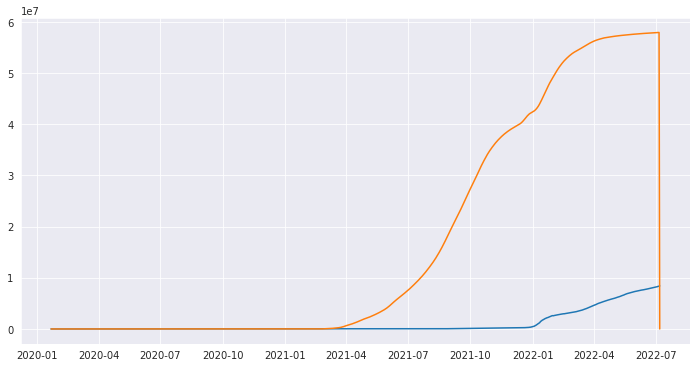

In [ ]:
cnt = 'australia'
plt.figure(figsize=(12,6))
# plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].daily_vaccinations)
plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].total_cases)
plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].total_vaccinations)
plt.show()

In [ ]:
df.columns

Index(['date', 'country', 'total_cases', 'total_deaths', 'daily_cases',
       'daily_deaths', 'fully_vaccinated', 'total_vaccinations',
       'total_boosters', 'daily_vaccinations', 'daily_people_vaccinated'],
      dtype='object')

In [ ]:
df

,date,country,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,2020-01-22,afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
306260,2022-04-01,tuvalu,0.0,0.0,0.0,0.0,0.0,10200.0,0.0,3.0,1.0
306261,2022-04-02,tuvalu,0.0,0.0,0.0,0.0,0.0,10203.0,0.0,3.0,1.0
306262,2022-04-03,tuvalu,0.0,0.0,0.0,0.0,0.0,10206.0,0.0,3.0,1.0
306263,2022-04-04,tuvalu,0.0,0.0,0.0,0.0,0.0,10209.0,0.0,3.0,1.0


In [ ]:
covid_df

,date,country,total_cases,total_deaths,daily_cases,daily_deaths
0,2020-01-22,afghanistan,0,0,0,0
1,2020-01-23,afghanistan,0,0,0,0
2,2020-01-24,afghanistan,0,0,0,0
3,2020-01-25,afghanistan,0,0,0,0
4,2020-01-26,afghanistan,0,0,0,0
...,...,...,...,...,...,...
255640,2022-07-02,zimbabwe,255586,5555,0,0
255641,2022-07-03,zimbabwe,255586,5555,0,0
255642,2022-07-04,zimbabwe,255726,5558,140,3
255643,2022-07-05,zimbabwe,255755,5558,29,0


In [ ]:
vaccine_df[vaccine_df.country=='united kingdom']

,date,country,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
30198,2021-01-10,united kingdom,374613,0,0,0,0
30199,2021-01-11,united kingdom,393925,140441,0,140441,121129
30200,2021-01-12,united kingdom,407294,304484,0,164043,147702
30201,2021-01-13,united kingdom,415656,496572,0,192088,178407
30202,2021-01-14,united kingdom,420510,710550,0,213978,202503
...,...,...,...,...,...,...,...
110141,2022-06-18,united kingdom,2424345,7273577,2047814,2799,304
110142,2022-06-19,united kingdom,2424821,7276292,2048080,2715,301
110143,2022-06-20,united kingdom,2424991,7278965,2048423,2673,318
110144,2022-06-21,united kingdom,2425417,7281691,2048823,2726,361


In [ ]:
df[df.country=='united kingdom']

,date,country,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
286165,2020-01-22,united kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286173,2020-01-23,united kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286181,2020-01-24,united kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286189,2020-01-25,united kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286197,2020-01-26,united kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295429,2022-07-02,united kingdom,22741065.0,180417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295437,2022-07-03,united kingdom,22741065.0,180417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295445,2022-07-04,united kingdom,22741065.0,180417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295453,2022-07-05,united kingdom,22741065.0,180417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


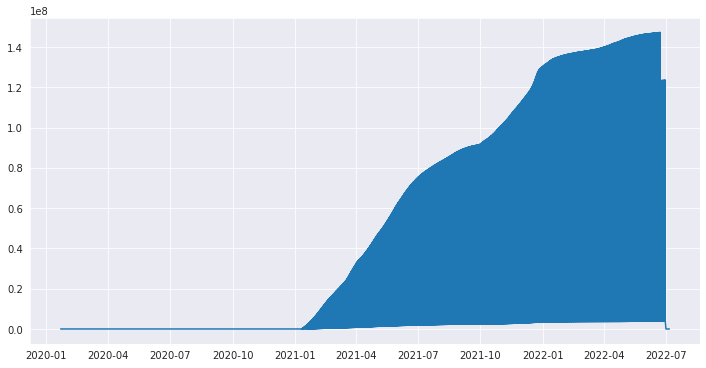

In [ ]:
cnt = 'united kingdom'
plt.figure(figsize=(12,6))
# plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].daily_vaccinations)
plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].total_vaccinations)
plt.show()

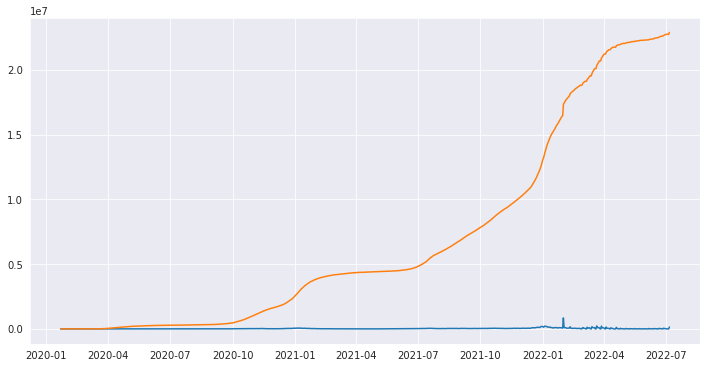

In [ ]:
cnt = 'united kingdom'
plt.figure(figsize=(12,6))
plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].daily_cases)
plt.plot(df[df['country']==cnt].date, df[df['country']==cnt].total_cases)
plt.show()

In [ ]:
covid_df[covid_df.country=='antarctica'].tail()

,date,country,total_cases,total_deaths,new_cases,new_deaths
5371,2022-07-01,antarctica,11,0,0,0
5372,2022-07-02,antarctica,11,0,0,0
5373,2022-07-03,antarctica,11,0,0,0
5374,2022-07-04,antarctica,11,0,0,0
5375,2022-07-05,antarctica,11,0,0,0


In [ ]:
set(cov)

{'antarctica',
 'eritrea',
 'holy see',
 'isle of man',
 'marshall islands',
 'micronesia',
 'montserrat',
 'new caledonia',
 'north korea',
 'palau'}

In [ ]:
set(vac)

{'cape verde', 'niue', 'northern cyprus', 'oceania', 'turkmenistan', 'tuvalu'}

In [ ]:
inter

{'afghanistan',
 'albania',
 'algeria',
 'andorra',
 'angola',
 'anguilla',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'botswana',
 'brazil',
 'british virgin islands',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cambodia',
 'cameroon',
 'cayman islands',
 'central african republic',
 'chad',
 'chile',
 'colombia',
 'comoros',
 'cook islands',
 'costa rica',
 "cote d'ivoire",
 'croatia',
 'cuba',
 'curacao',
 'cyprus',
 'czechia',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'ecuador',
 'egypt',
 'el salvador',
 'equatorial guinea',
 'estonia',
 'eswatini',
 'ethiopia',
 'fiji',
 'finland',
 'france',
 'french polynesia',
 'gabon',
 'gambia',
 'georgia',
 'germany',
 'ghana',
 'gibraltar',
 'greece',
 'greenland',
 'grenada',
 'guatemala',
 'guernsey',
 'gui

In [ ]:
uni

{'afghanistan',
 'albania',
 'algeria',
 'andorra',
 'angola',
 'anguilla',
 'antarctica',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia',
 'bonaire sint eustatius and saba',
 'bosnia and herzegovina',
 'botswana',
 'brazil',
 'british virgin islands',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cabo verde',
 'cambodia',
 'cameroon',
 'canada',
 'cape verde',
 'cayman islands',
 'central african republic',
 'chad',
 'chile',
 'china',
 'colombia',
 'comoros',
 'congo',
 'cook islands',
 'costa rica',
 "cote d'ivoire",
 'croatia',
 'cuba',
 'curacao',
 'cyprus',
 'czechia',
 'democratic republic of congo',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'ecuador',
 'egypt',
 'el salvador',
 'equatorial guinea',
 'eritrea',
 'estonia',
 'eswatini',
 'ethiopia',
 'falkland islands',

In [ ]:
vaccine_df[vaccine_df.Country=='France']

In [ ]:
# merged = covid_df.combine_first(vaccine_df)
# merged = merged.fillna(0)
# merged = merged.astype({"Fully vaccinated":'int',
#                                 'Total vaccinations':'int',
#                                 'Total boosters':'int',
#                                 'Daily vaccinations':'int',
#                                 'Daily people vaccinated':'int'})
# merged = merged[['Date',
#                  'Country',
#                  'New cases',
#                  'New deaths',
#                  'New recovered',
#                  'Total boosters',
#                  'Total cases',
#                  'Total deaths',
#                  'Total recovered',
#                  'Daily people vaccinated',
#                  'Daily vaccinations',
#                  'Fully vaccinated',
#                  'Total vaccinations']]
# merged
covid_df.combine_first(vaccine_df)

,Country,Daily people vaccinated,Daily vaccinations,Date,Fully vaccinated,New cases,New deaths,Total boosters,Total cases,Total deaths,Total vaccinations
0,Afghanistan,0.0,0.0,2020-01-22,0.0,0,0,0.0,0,0,0.0
1,Afghanistan,1367.0,1367.0,2020-01-23,0.0,0,0,0.0,0,0,1367.0
2,Afghanistan,1367.0,1367.0,2020-01-24,0.0,0,0,0.0,0,0,2734.0
3,Afghanistan,1367.0,1367.0,2020-01-25,0.0,0,0,0.0,0,0,4101.0
4,Afghanistan,1367.0,1367.0,2020-01-26,0.0,0,0,0.0,0,0,5468.0
...,...,...,...,...,...,...,...,...,...,...,...
254785,Zimbabwe,NaN,NaN,2022-06-29,NaN,137,4,NaN,255520,5553,NaN
254786,Zimbabwe,NaN,NaN,2022-06-30,NaN,66,2,NaN,255586,5555,NaN
254787,Zimbabwe,NaN,NaN,2022-07-01,NaN,0,0,NaN,255586,5555,NaN
254788,Zimbabwe,NaN,NaN,2022-07-02,NaN,0,0,NaN,255586,5555,NaN


In [ ]:
pd.merge(covid_df, vaccine_df, how="outer", on=["Date", "Country"])

,Date,Country,Total cases,Total deaths,New cases,New deaths,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
272925,2022-06-29,World,NaN,NaN,NaN,NaN,4.799123e+09,0.0,2.123141e+09,0.0,0.0
272926,2022-06-30,World,NaN,NaN,NaN,NaN,4.800716e+09,0.0,2.125459e+09,0.0,0.0
272927,2022-07-01,World,NaN,NaN,NaN,NaN,4.801855e+09,0.0,2.127183e+09,0.0,0.0
272928,2022-07-02,World,NaN,NaN,NaN,NaN,4.802835e+09,0.0,2.129358e+09,0.0,0.0


In [ ]:
a = pd.merge(covid_df, vaccine_df, how="outer", on=["Date", "Country"])

,Date,Country,Total cases,Total deaths,New cases,New deaths,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
272925,2022-06-29,World,NaN,NaN,NaN,NaN,4.799123e+09,0.0,2.123141e+09,0.0,0.0
272926,2022-06-30,World,NaN,NaN,NaN,NaN,4.800716e+09,0.0,2.125459e+09,0.0,0.0
272927,2022-07-01,World,NaN,NaN,NaN,NaN,4.801855e+09,0.0,2.127183e+09,0.0,0.0
272928,2022-07-02,World,NaN,NaN,NaN,NaN,4.802835e+09,0.0,2.129358e+09,0.0,0.0


In [ ]:
a[a.Country=='India']

,Date,Country,Total cases,Total deaths,New cases,New deaths,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
132312,2020-01-22,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
132313,2020-01-23,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
132314,2020-01-24,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
132315,2020-01-25,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
132316,2020-01-26,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
133201,2022-06-29,India,43452164.0,525116.0,18819.0,39.0,913642889.0,1.970128e+09,43868135.0,1432271.0,177132.0
133202,2022-06-30,India,43469234.0,525139.0,17070.0,23.0,914479703.0,1.971543e+09,44348776.0,1414474.0,178313.0
133203,2022-07-01,India,43486326.0,525168.0,17092.0,29.0,915190727.0,1.972913e+09,44697360.0,1369941.0,175455.0
133204,2022-07-02,India,43502429.0,525199.0,16103.0,31.0,915792386.0,1.974191e+09,45002940.0,1278094.0,165575.0


In [ ]:
vaccine_df[vaccine_df.Country=='India']

,Date,Country,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
45795,2021-01-15,India,0,0,0,0,0
45796,2021-01-16,India,0,191181,0,191181,191181
45797,2021-01-17,India,0,303331,0,112150,112150
45798,2021-01-18,India,0,454681,0,151350,151350
45799,2021-01-19,India,0,623390,0,168709,168709
...,...,...,...,...,...,...,...
46325,2022-06-29,India,913642889,1970128269,43868135,1432271,177132
46326,2022-06-30,India,914479703,1971542743,44348776,1414474,178313
46327,2022-07-01,India,915190727,1972912684,44697360,1369941,175455
46328,2022-07-02,India,915792386,1974190778,45002940,1278094,165575


In [ ]:
covid_df[covid_df.Country=='India']

,Date,Country,Total cases,Total deaths,New cases,New deaths
132312,2020-01-22,India,0,0,0,0
132313,2020-01-23,India,0,0,0,0
132314,2020-01-24,India,0,0,0,0
132315,2020-01-25,India,0,0,0,0
132316,2020-01-26,India,0,0,0,0
...,...,...,...,...,...,...
133201,2022-06-29,India,43452164,525116,18819,39
133202,2022-06-30,India,43469234,525139,17070,23
133203,2022-07-01,India,43486326,525168,17092,29
133204,2022-07-02,India,43502429,525199,16103,31


In [ ]:
pd.concat([covid_df, vaccine_df], axis=0, ignore_index=True)

,Date,Country,Total cases,Total deaths,New cases,New deaths,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
366697,2022-06-22,Zimbabwe,NaN,NaN,NaN,NaN,4588340.0,11898709.0,1043552.0,7816.0,2587.0
366698,2022-06-23,Zimbabwe,NaN,NaN,NaN,NaN,4616555.0,11915330.0,1064036.0,16621.0,5081.0
366699,2022-06-24,Zimbabwe,NaN,NaN,NaN,NaN,4620396.0,11931309.0,1065656.0,15979.0,4958.0
366700,2022-06-25,Zimbabwe,NaN,NaN,NaN,NaN,4622428.0,11947500.0,1067073.0,16191.0,5001.0


In [ ]:
pd.merge(covid_df, vaccine_df, how="outer", on=['Date','Country'])

,Date,Country,Total cases,Total deaths,New cases,New deaths,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
272925,2022-06-29,World,NaN,NaN,NaN,NaN,4.799123e+09,0.0,2.123141e+09,0.0,0.0
272926,2022-06-30,World,NaN,NaN,NaN,NaN,4.800716e+09,0.0,2.125459e+09,0.0,0.0
272927,2022-07-01,World,NaN,NaN,NaN,NaN,4.801855e+09,0.0,2.127183e+09,0.0,0.0
272928,2022-07-02,World,NaN,NaN,NaN,NaN,4.802835e+09,0.0,2.129358e+09,0.0,0.0


In [ ]:
vaccine_df

,Date,Country,Fully vaccinated,Total vaccinations,Total boosters,Daily vaccinations,Daily people vaccinated
0,2021-02-22,Afghanistan,0,0,0,0,0
1,2021-02-23,Afghanistan,0,1367,0,1367,1367
2,2021-02-24,Afghanistan,0,2734,0,1367,1367
3,2021-02-25,Afghanistan,0,4101,0,1367,1367
4,2021-02-26,Afghanistan,0,5468,0,1367,1367
...,...,...,...,...,...,...,...
111907,2022-06-22,Zimbabwe,4588340,11898709,1043552,7816,2587
111908,2022-06-23,Zimbabwe,4616555,11915330,1064036,16621,5081
111909,2022-06-24,Zimbabwe,4620396,11931309,1065656,15979,4958
111910,2022-06-25,Zimbabwe,4622428,11947500,1067073,16191,5001
